In [38]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [39]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

# Financial Data and Preprocessing

## Getting data from Yahoo Finance

In [40]:
import pandas as pa
import yfinance as yf
import datetime

In [41]:
df_yahoo = yf.download('AAPL',
                      start='2000-01-01',
                      end=datetime.datetime.now().date(),
                      progress=False)

In [42]:
# print(f'Downloaded {df_yahoo.shape} rows of data.')
print(f'Downloaded {df_yahoo.shape[0]} rows of data.')
df_yahoo.head()

Downloaded 5749 rows of data.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.851942,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.780115,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.791530,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.723033,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.757282,460734400


## passed - Getting data from Quandl

## passed - Getting data from Intrinio

## Converting prices to returns

In [43]:
import pandas as pd
import numpy as np

In [44]:
df = df_yahoo
df = df.loc[:,['Adj Close']]
df.rename(columns={'Adj Close' : 'adj_close'}, inplace=True)

In [45]:
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close / df.adj_close.shift(1))

In [46]:
df.head()

,adj_close,simple_rtn,log_rtn
Date,,,
2000-01-03,0.851942,NaN,NaN
2000-01-04,0.780115,-0.084310,-0.088078
2000-01-05,0.791530,0.014633,0.014527
2000-01-06,0.723033,-0.086538,-0.090514
2000-01-07,0.757282,0.047369,0.046281


In [47]:
df_all_dates = pd.DataFrame(index=pd.date_range(start='2000-01-01', 
                                                end=datetime.datetime.now().date()))
df = df_all_dates.join(df['adj_close'], how='left').fillna(method='ffill').asfreq('M')
df

,adj_close
2000-01-31,0.789628
2000-02-29,0.872397
2000-03-31,1.033652
2000-04-30,0.944224
2000-05-31,0.639313
...,...
2022-06-30,136.304245
2022-07-31,162.015808
2022-08-31,156.959625
2022-09-30,137.971115


## Changing frequency

In [48]:
df = yf.download('AAPL',
                start='2000-01-01',
                end=datetime.datetime.now().date(),
                auto_adjust=False,
                progress=False)

# keep only the adjusted close price
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close' : 'adj_close'}, inplace=True)

# log returns
df['log_rtn'] = np.log(df.adj_close / df.adj_close.shift(1))

# remove redundant data
df.drop('adj_close', axis=1, inplace=True)
df.dropna(axis=0, inplace=True)

df.head()

,log_rtn
Date,
2000-01-04,-0.088077
2000-01-05,0.014527
2000-01-06,-0.090514
2000-01-07,0.046282
2000-01-10,-0.017745


In [49]:
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

In [50]:
# df_rv = df.groupby(pd.Grouper(freq='M'))['log_rtn'].sum()
# df_rv.head()

In [51]:
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn':'rv'}, inplace=True)

In [52]:
df_rv.rv = df_rv.rv * np.sqrt(12)

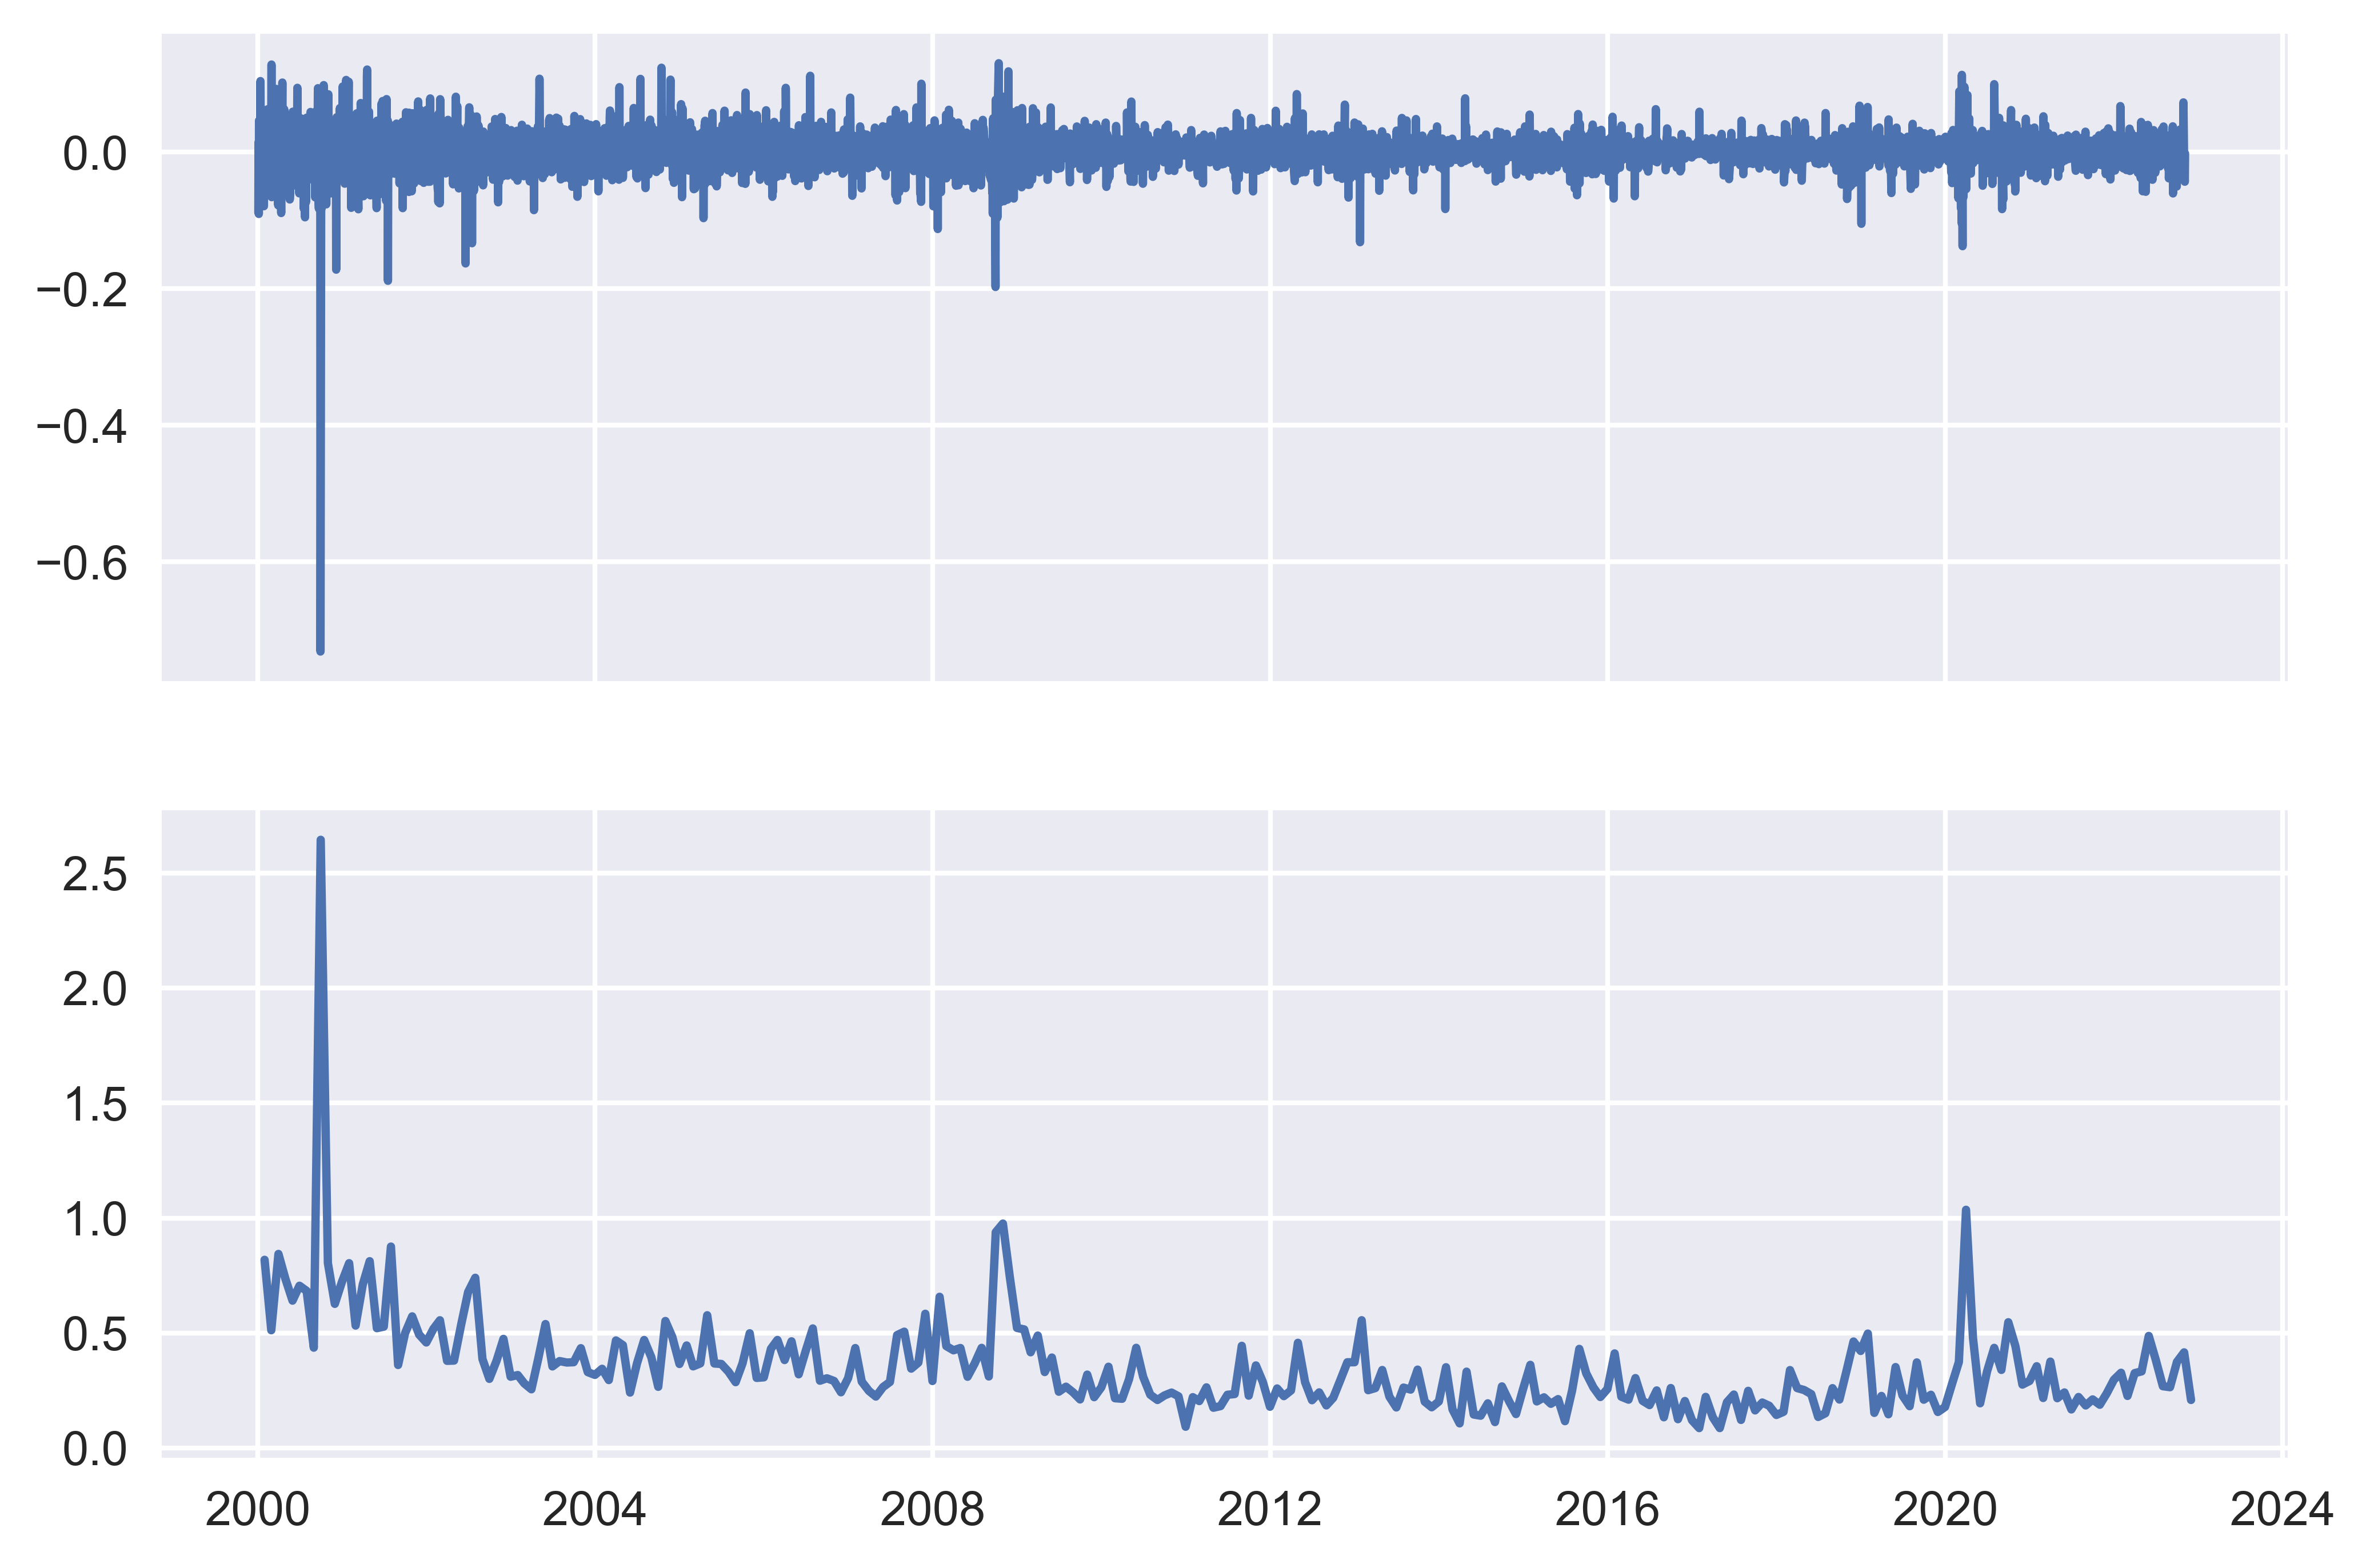

In [53]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df)
ax[1].plot(df_rv)
plt.show()

## Visualizing time series data

In [54]:
df = yf.download('MSFT', auto_adjust=False, progress=False)
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close / df.adj_close.shift(1))

df.dropna(how='any', inplace=True)

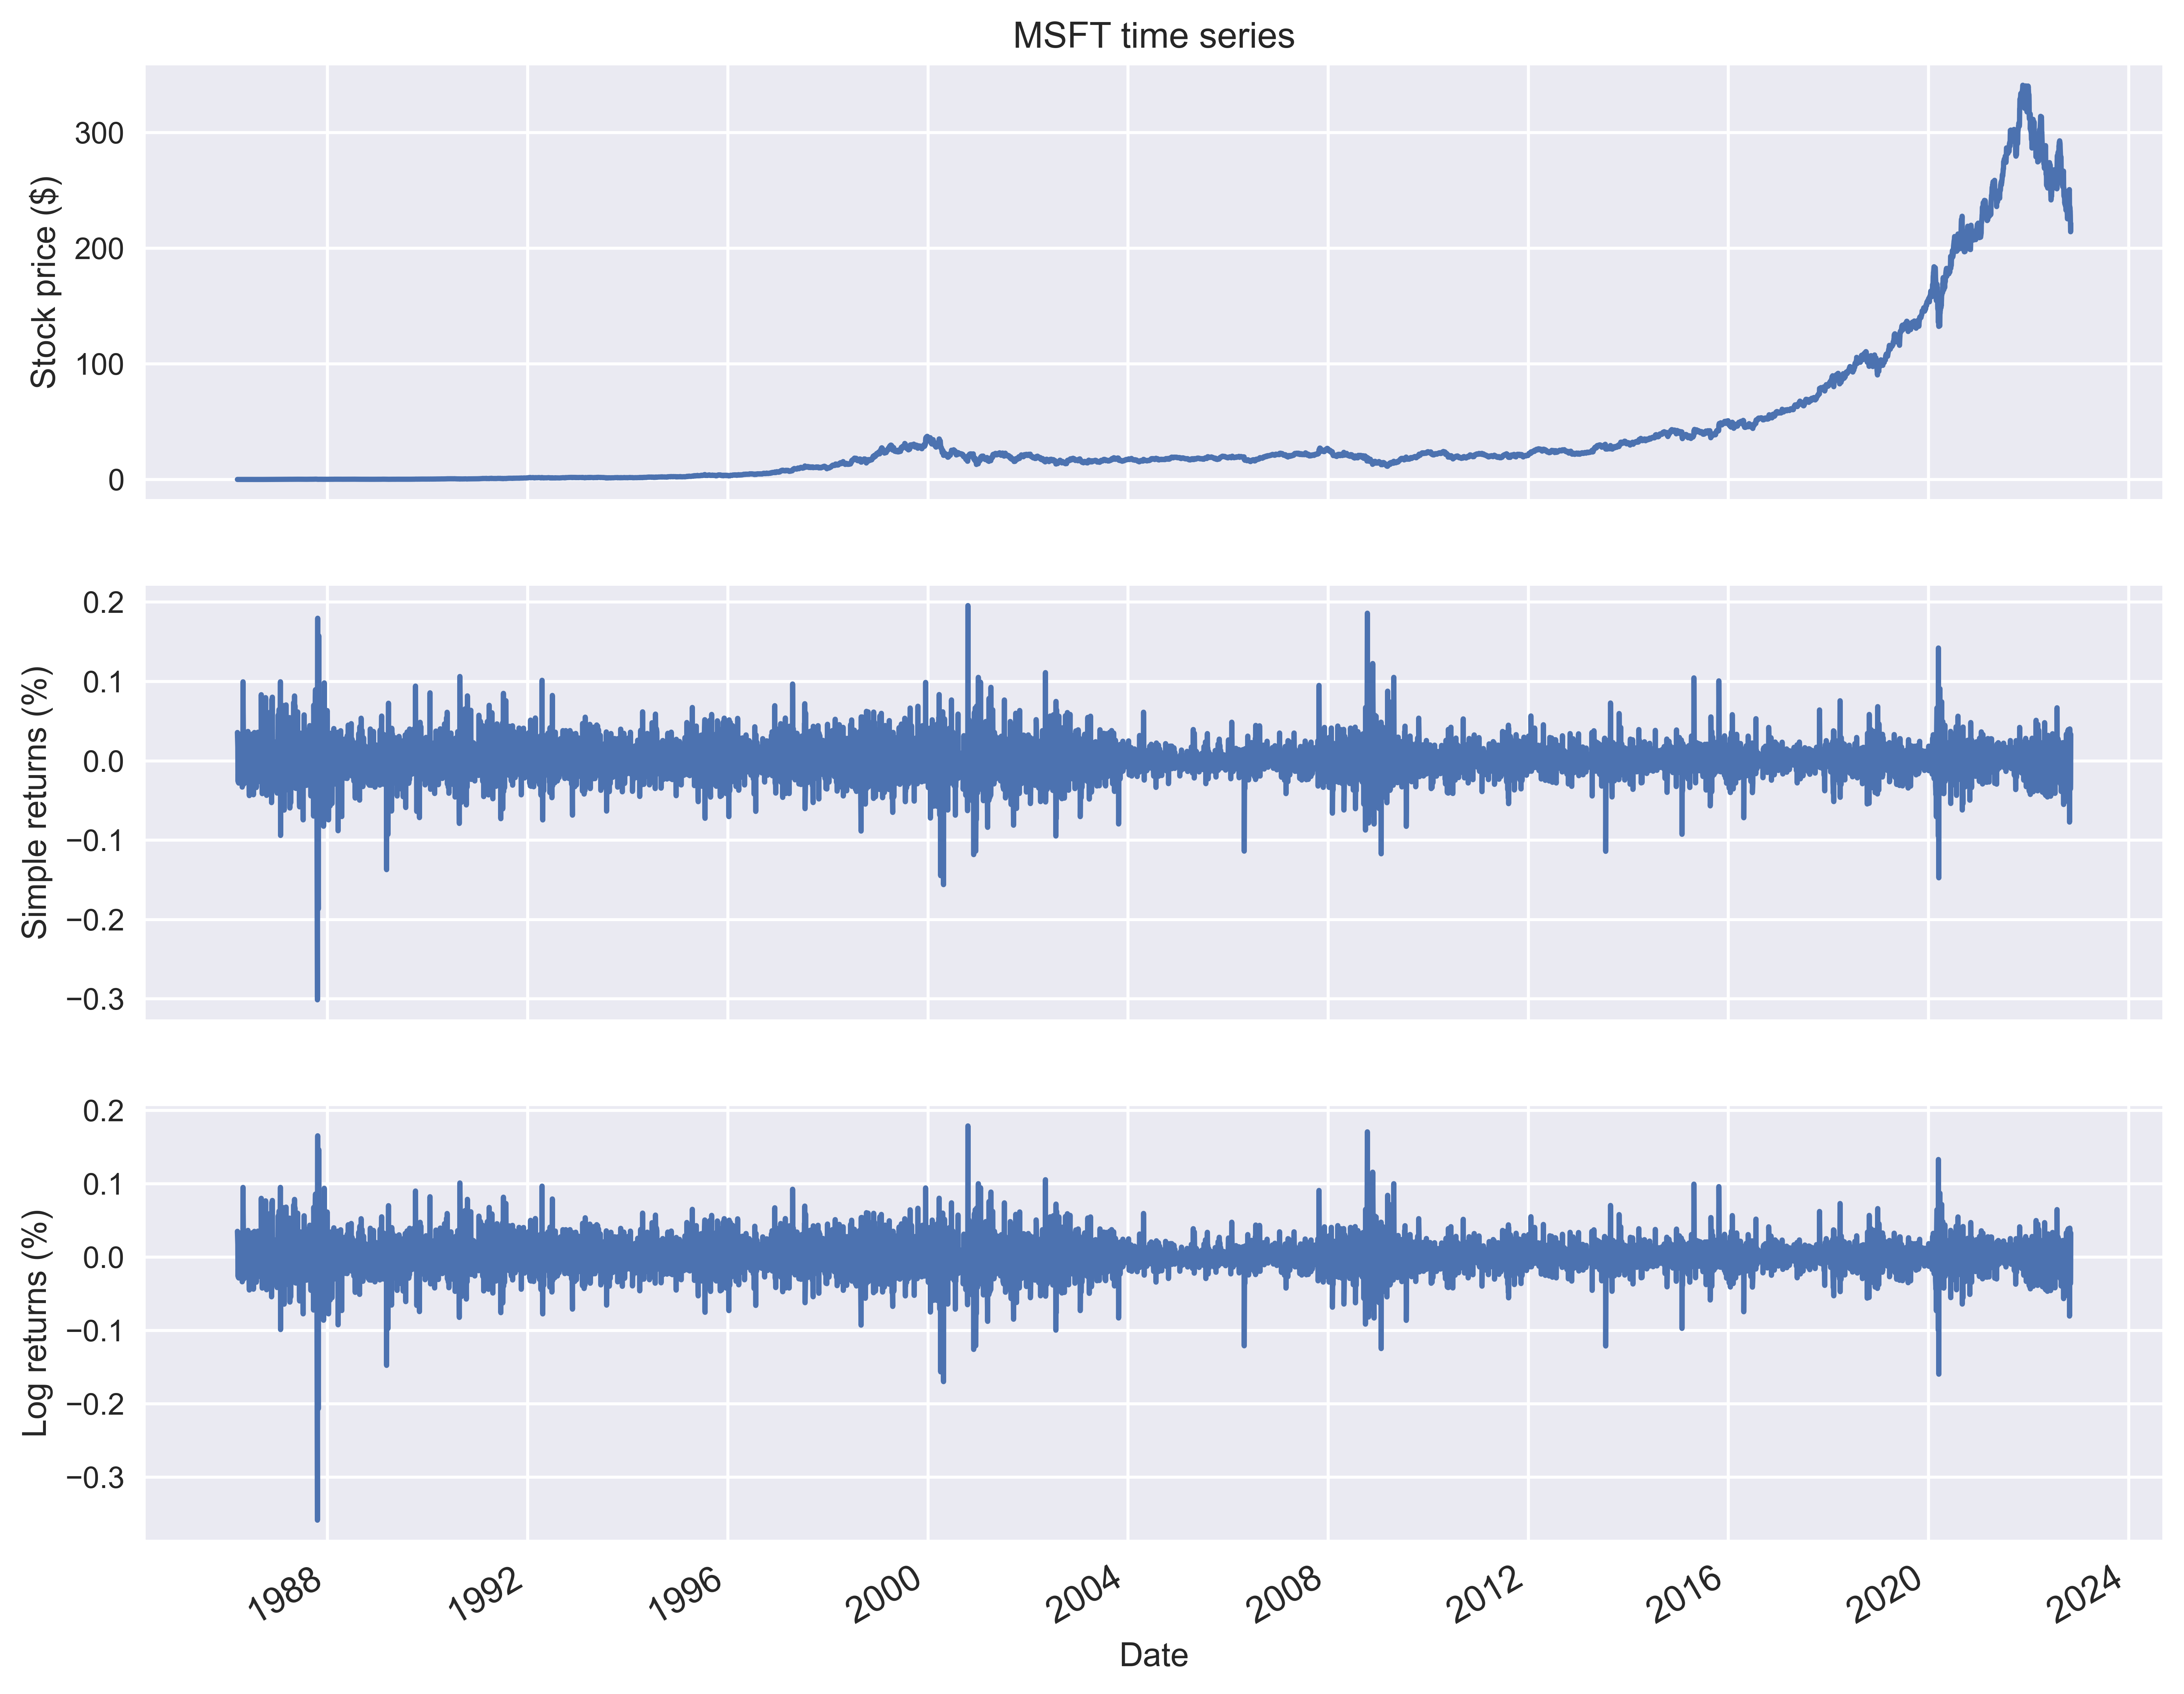

In [55]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True) # sharex 옵션은 아래/위 그래프가 x축을 공유한다는 의미이다.

# add prices
df.adj_close.plot(ax=ax[0])
ax[0].set(title='MSFT time series', ylabel='Stock price ($)')

# add simple returns
df.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel = 'Simple returns (%)')

# add log returns
df.log_rtn.plot(ax=ax[2])
ax[2].set(xlabel='Date', ylabel='Log returns (%)')
ax[2].tick_params(axis='x',
                 which='major',
                 labelsize=12)

plt.show()

In [56]:
# !pip install cufflinks
# !pip install plotly

In [57]:
# import cufflinks as cf
# from plotly.offline import iplot
# from plotly.offline import init_notebook_mode

# init_notebook_mode()

In [58]:
# df.iplot(subplots=True, shape=(3, 1), shared_xaxes=True, title='MSFT time series')

## Identifying outliers

In [59]:
df = yf.download('AAPL',
                start='2000-01-01',
                end=datetime.datetime.now().date(),
                progress=False)
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [60]:
df['simple_rtn'] = df.adj_close.pct_change()

In [61]:
df.head()

,adj_close,simple_rtn
Date,,
2000-01-03,0.851942,NaN
2000-01-04,0.780115,-0.084310
2000-01-05,0.791531,0.014633
2000-01-06,0.723033,-0.086538
2000-01-07,0.757282,0.047369


In [62]:
df_rolling = df[['simple_rtn']].rolling(window=21).agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()
df_rolling

,mean,std
Date,,
2000-01-03,NaN,NaN
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
2000-01-06,NaN,NaN
2000-01-07,NaN,NaN
...,...,...
2022-10-31,5.296786e-03,0.026686
2022-11-01,2.997010e-03,0.026463
2022-11-02,4.348127e-07,0.027321


In [63]:
df_outliers = df.join(df_rolling)
df_outliers.head()

,adj_close,simple_rtn,mean,std
Date,,,,
2000-01-03,0.851942,NaN,NaN,NaN
2000-01-04,0.780115,-0.084310,NaN,NaN
2000-01-05,0.791531,0.014633,NaN,NaN
2000-01-06,0.723033,-0.086538,NaN,NaN
2000-01-07,0.757282,0.047369,NaN,NaN


In [64]:
def identify_outliers(row, n_sigmas=3):
        '''
        Function for identifying the outliers using the 3 sigma rule. 
        The row must contain the following columns/indices: simple_rtn, mean, std.

        Parameters
        ----------
        row : pd.Series
            A row of a pd.DataFrame, over which the function can be applied.
        n_sigmas : int
            The number of standard deviations above/below the mean - used for detecting outliers

        Returns
        -------
        0/1 : int
            An integer with 1 indicating an outlier and 0 otherwise.
        '''
        x = row['simple_rtn']
        mu = row['mean']
        sigma = row['std']
        
        if (x > mu + 3*sigma) | (x < mu - 3*sigma):
            return 1
        else:
            return 0

In [65]:
df_outliers['outlier'] = df_outliers.apply(identify_outliers, axis=1)
outliers = df_outliers.loc[df_outliers['outlier']==1, ['simple_rtn']]
# outliers

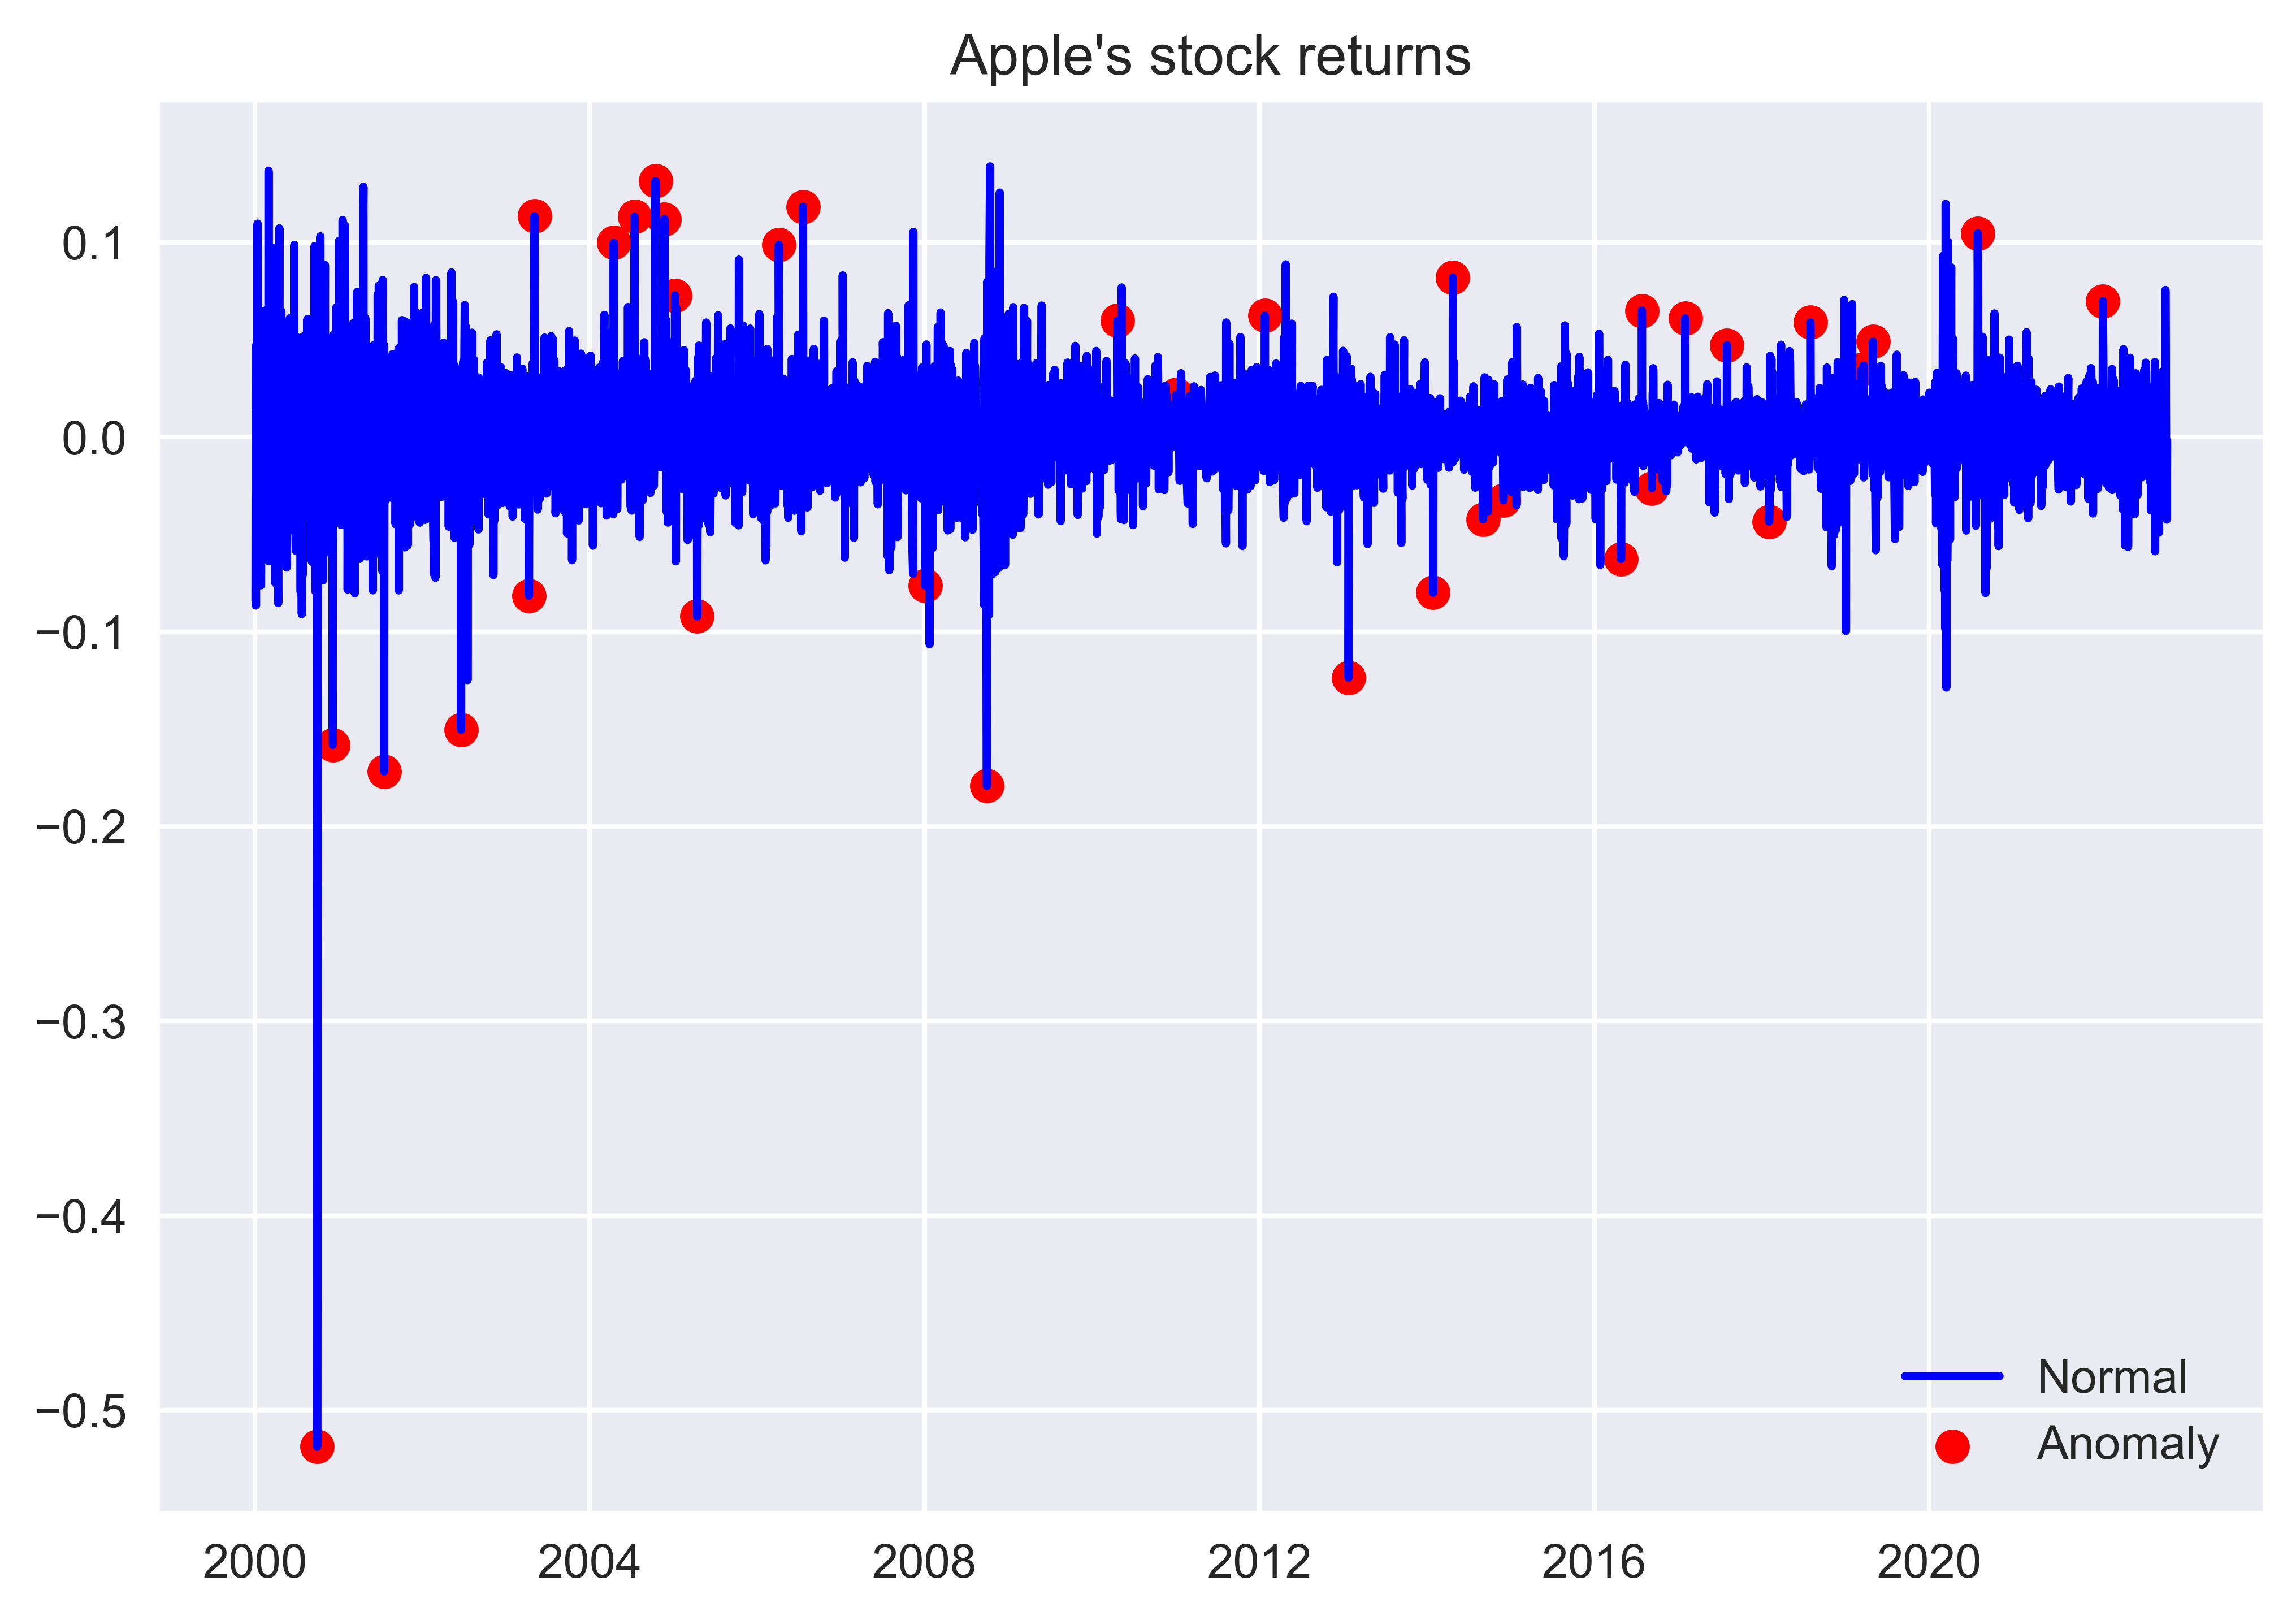

In [66]:
fig, ax = plt.subplots()

ax.plot(df_outliers.index, df_outliers.simple_rtn, color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn, color='red', label='Anomaly')
ax.set_title("Apple's stock returns")
ax.legend(loc='lower right')
plt.show()

## Investigating stylized facts of asset returns

In [67]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [68]:
df = yf.download('^GSPC',
                start='1985-01-01',
                end=datetime.datetime.now().date(),
                progress=False)

df = df[['Adj Close']].rename(columns={'Adj Close': 'adj_close'})
df['log_rtn'] = np.log(df.adj_close / df.adj_close.shift(1))
df = df[['adj_close', 'log_rtn']].dropna(how='any')

### Fact 1. Non-Gaussian distribution of returns

In [69]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)   # 학습 필요

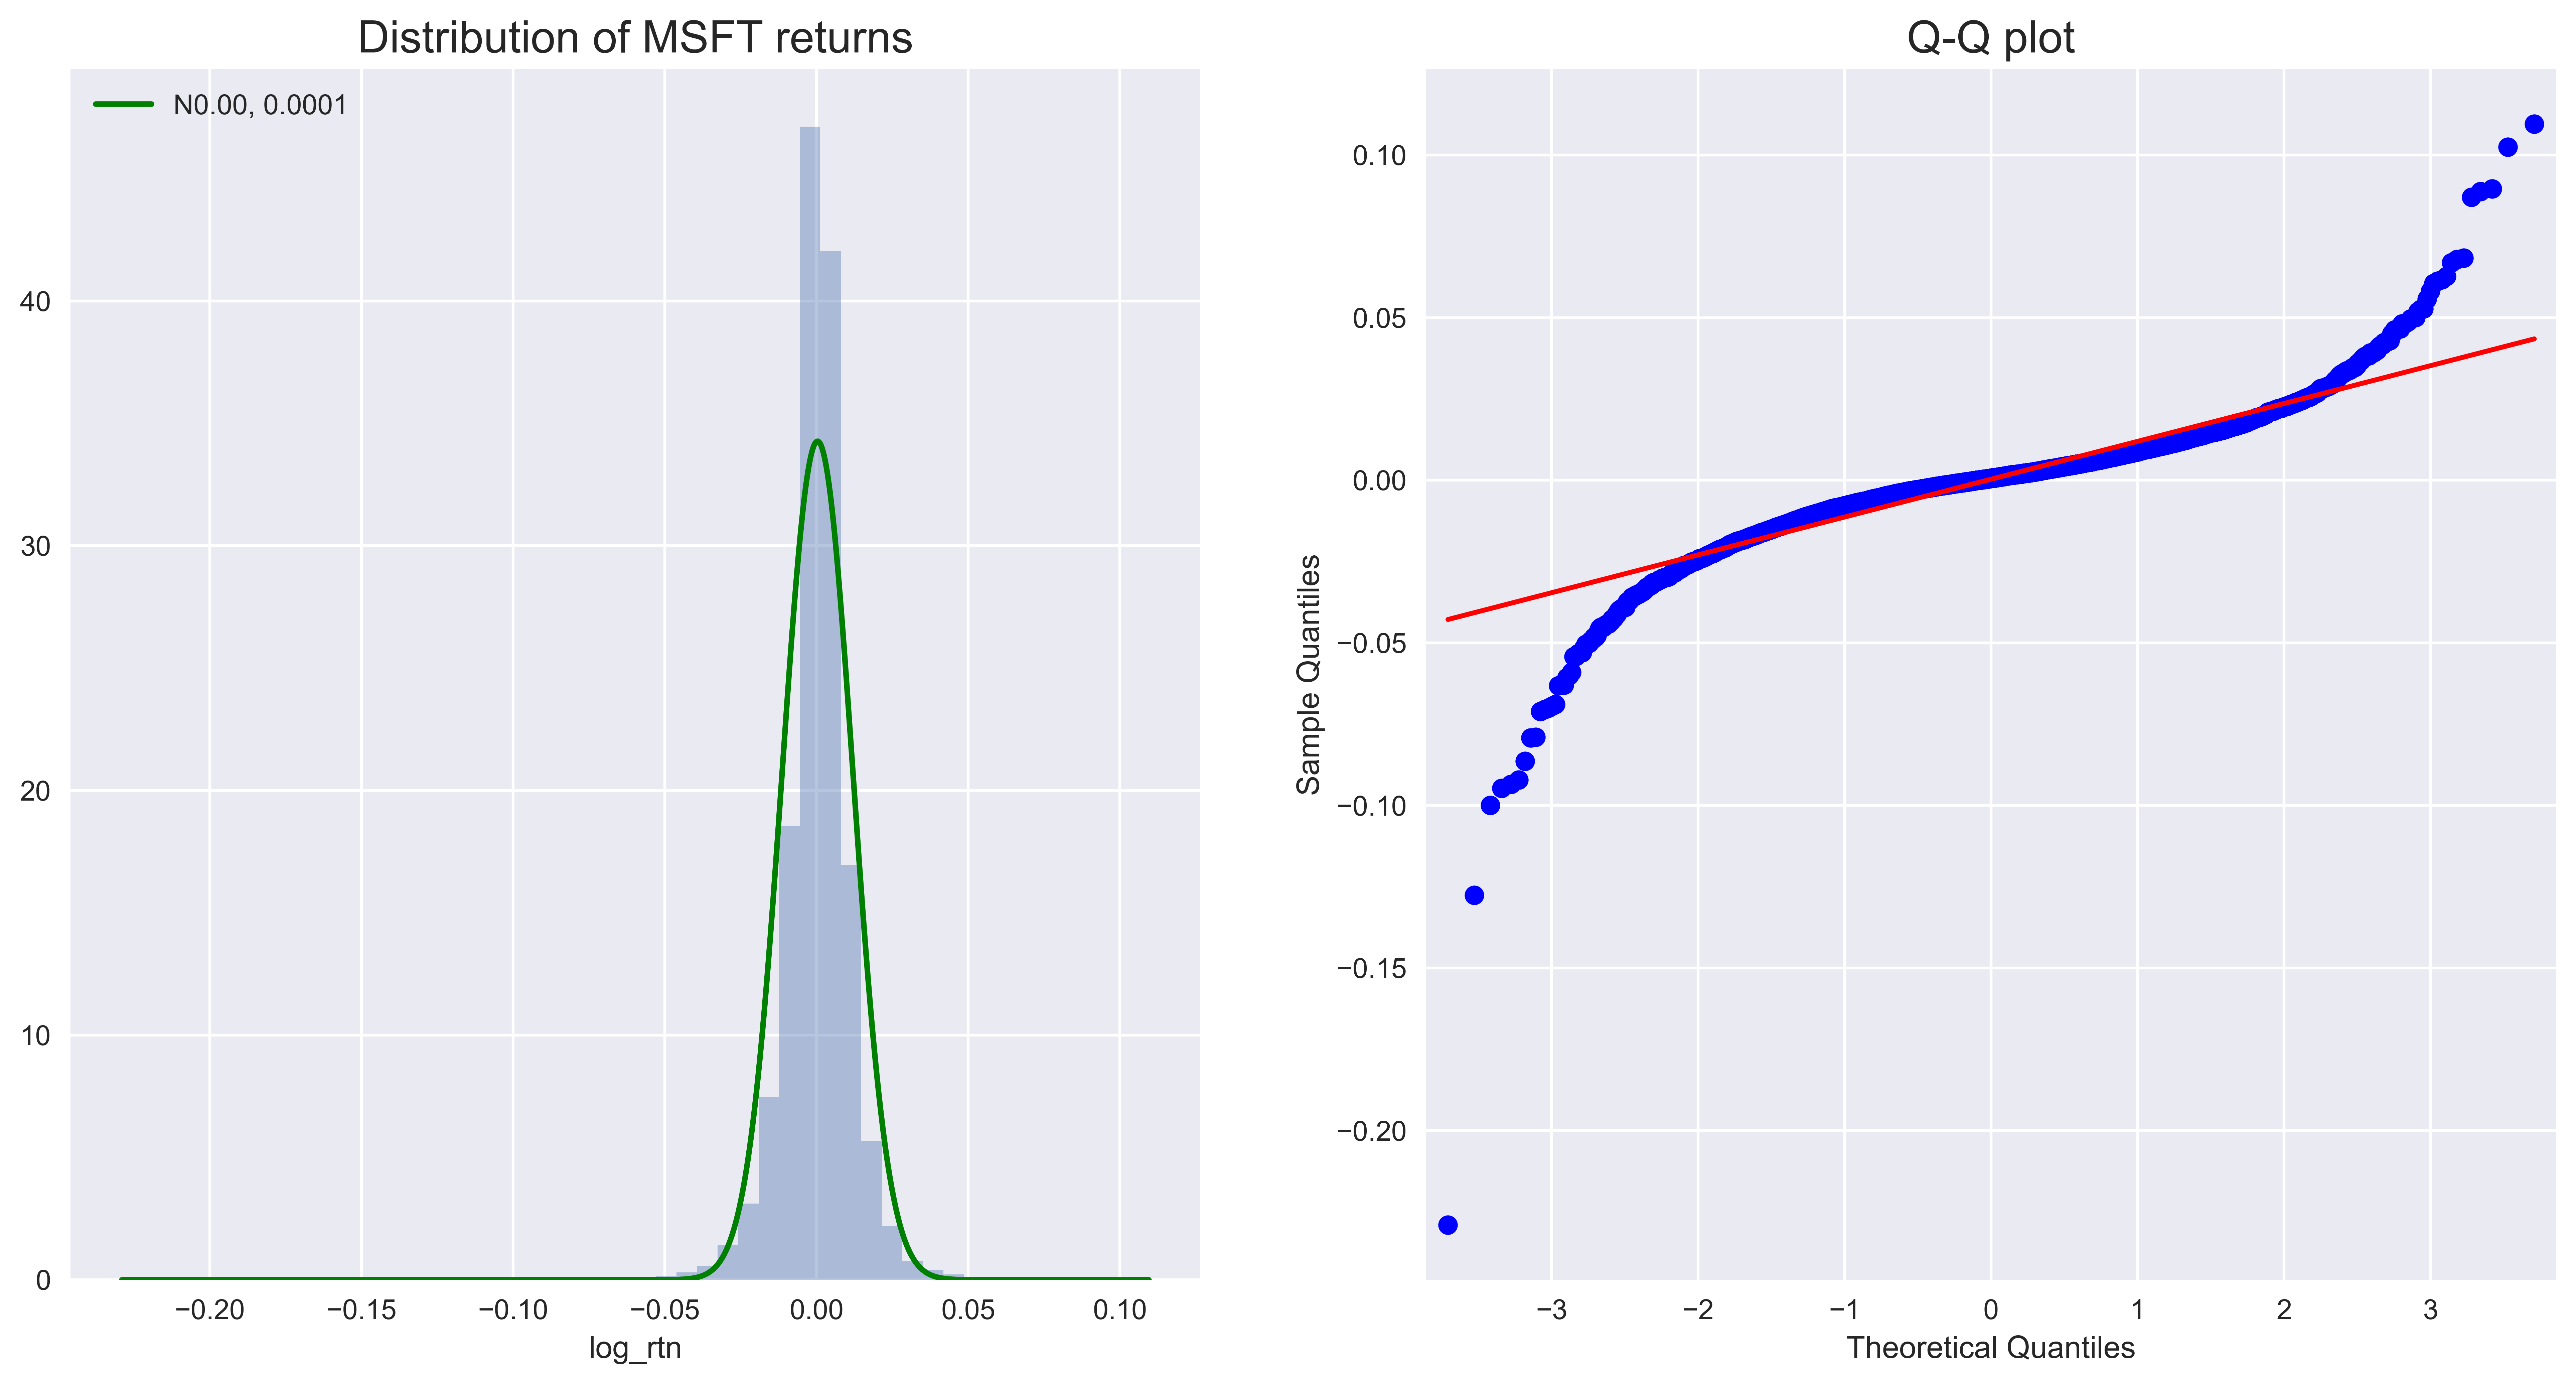

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of MSFT returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2, label=f'N{mu:.2f}, {sigma**2:.4f}')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize=16)

# plt.tight_layout()
# plt.savefig('images/ch1_im10.png')
plt.show()

In [71]:
jb_test = scs.jarque_bera(df.log_rtn.values)

print('---------- Descriptive Statistics ----------')
print('Range of dates: ', min(df.index.date), '-', max(df.index.date))
print('Number of observations: ', df.shape[0])
print(f'Mean: {df.log_rtn.mean():.4f}')
print(f'Median: {df.log_rtn.median():.4f}')
print(f'Min: {df.log_rtn.min():.4f}')
print(f'Max: {df.log_rtn.max():.4f}')
print(f'Standard Deviation: {df.log_rtn.std():.4f}')
print(f'Skewness: {df.log_rtn.skew():.4f}')
print(f'Kurtosis: {df.log_rtn.kurtosis():.4f}')
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

---------- Descriptive Statistics ----------
Range of dates:  1985-01-03 - 2022-11-04
Number of observations:  9539
Mean: 0.0003
Median: 0.0006
Min: -0.2290
Max: 0.1096
Standard Deviation: 0.0116
Skewness: -1.2057
Kurtosis: 25.5104
Jarque-Bera statistic: 260684.35 with p-value: 0.00


### Fact 2 - Volatility Clustering

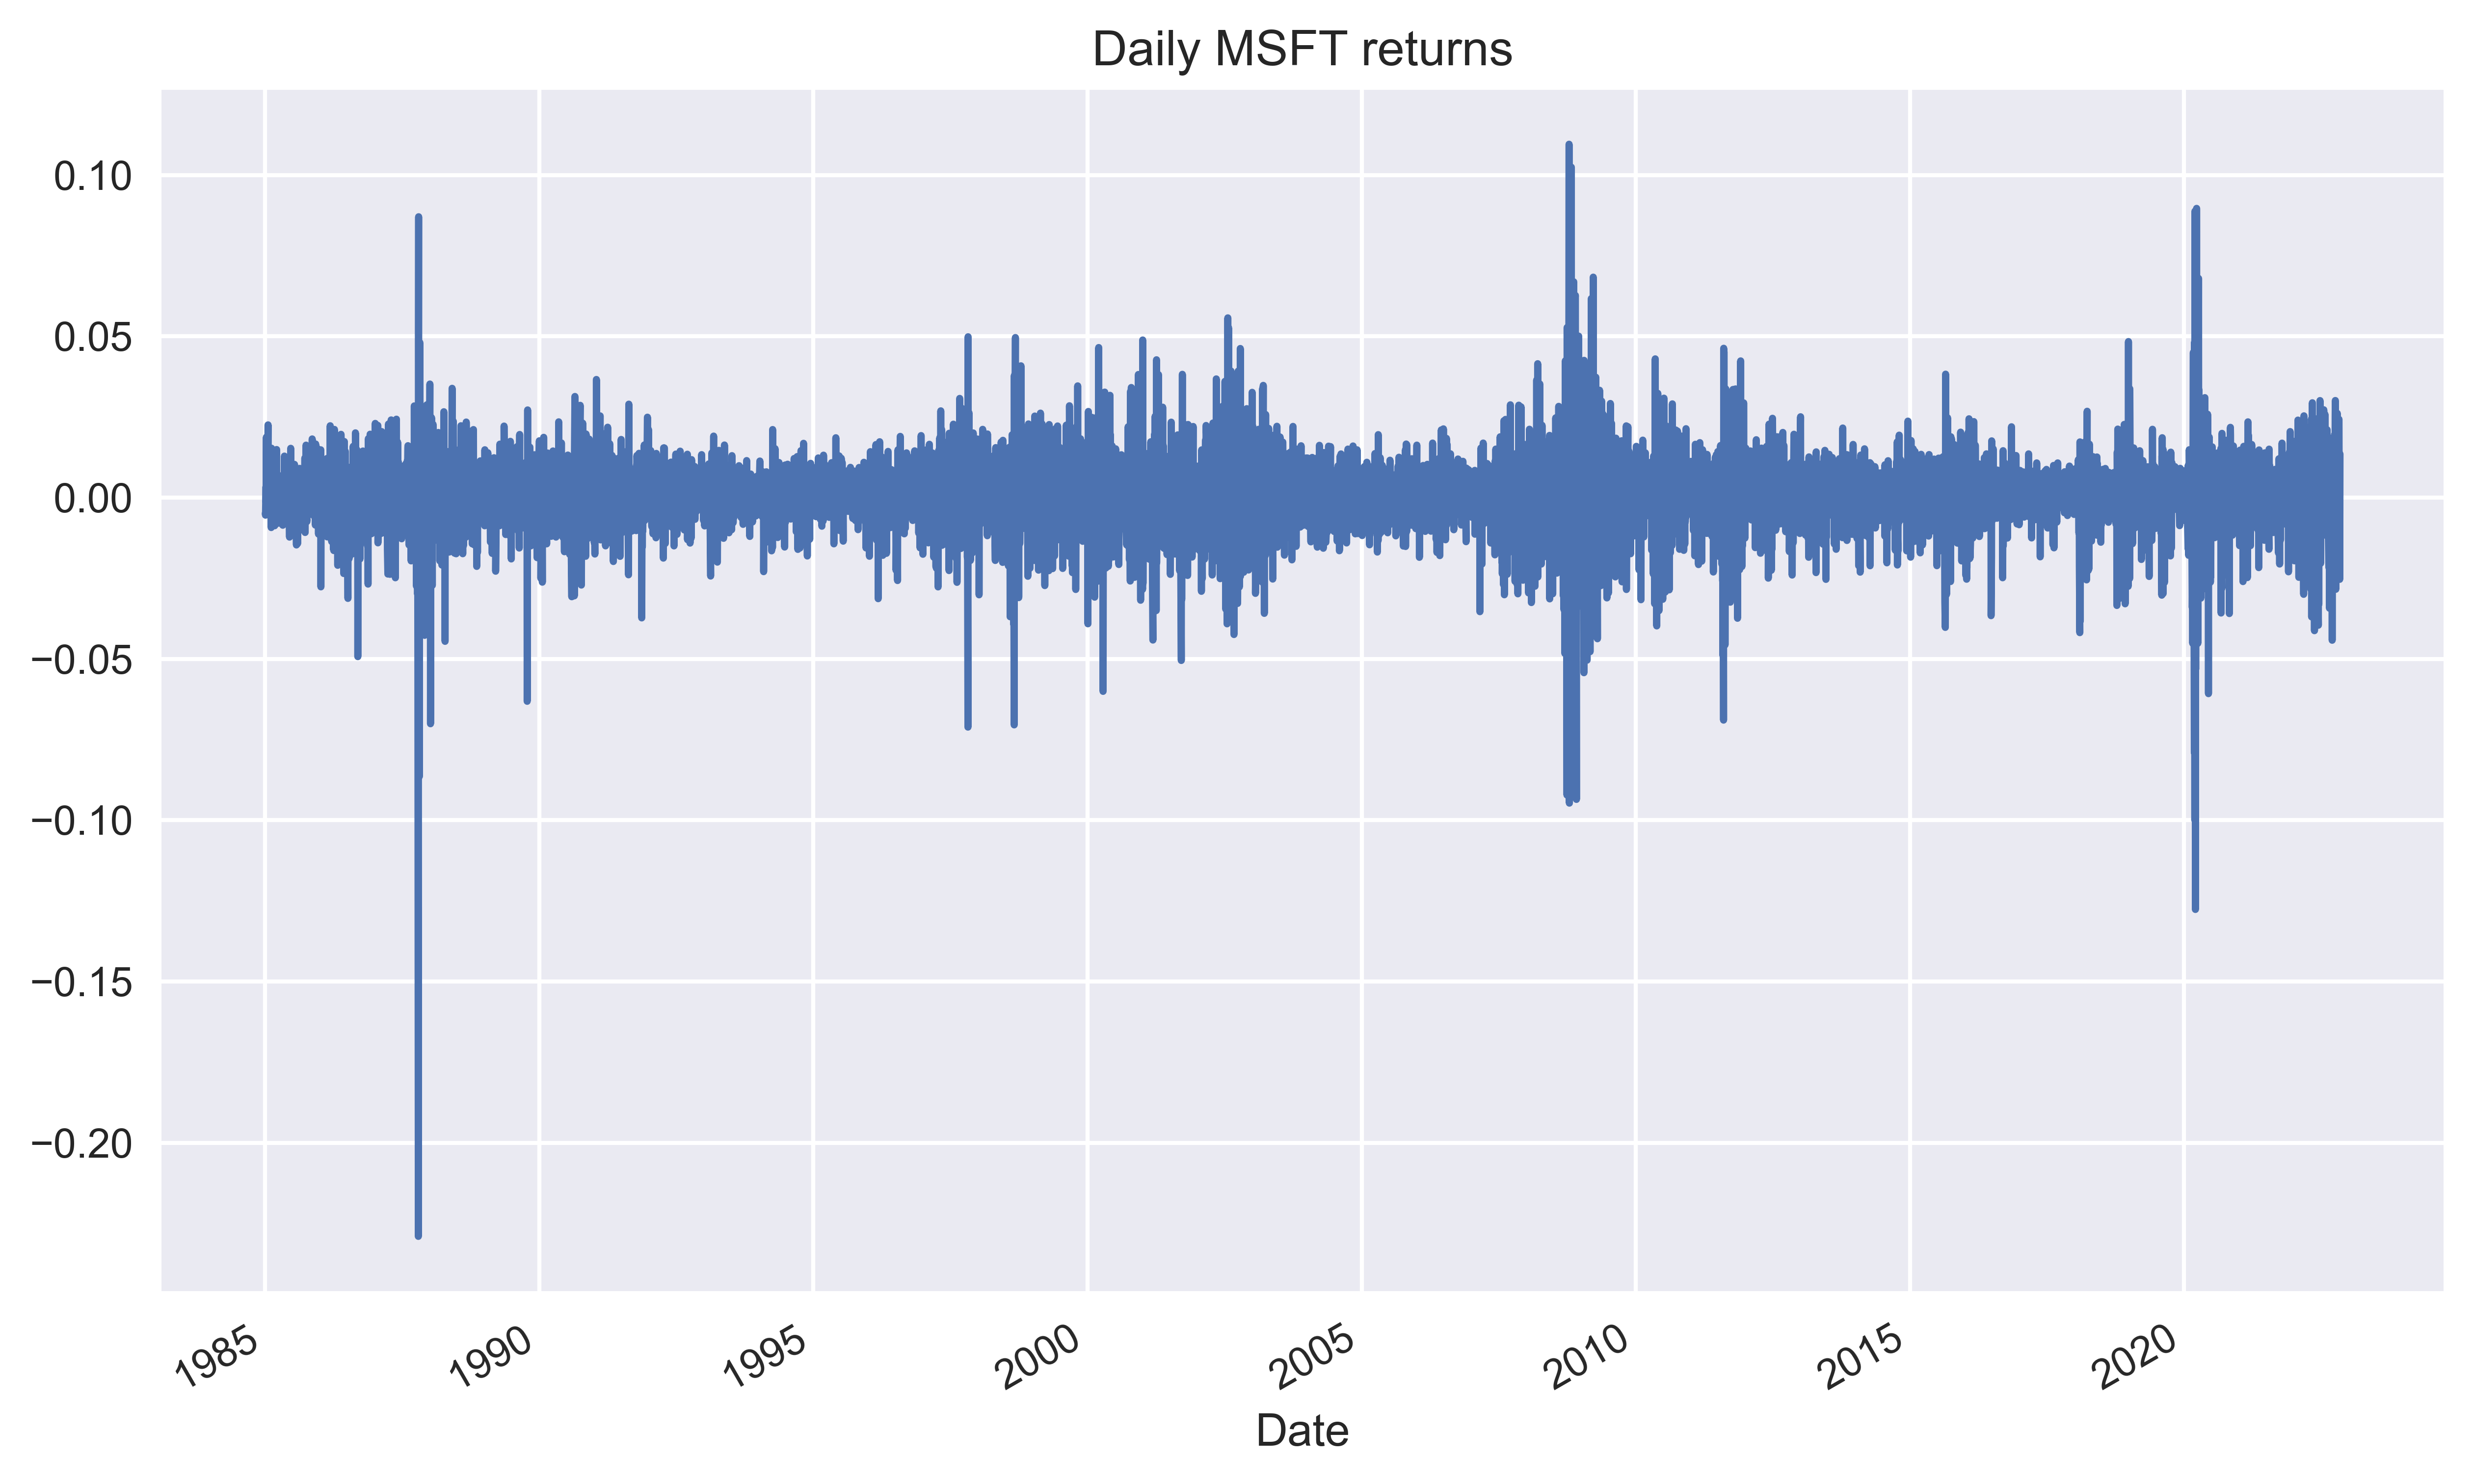

In [72]:
df.log_rtn.plot(title='Daily MSFT returns', figsize=(10, 6))

# plt.tight_layout()
# plt.savefig('images/ch1_im12.png')
plt.show()

### Fact 3 - Absence of autocorrelation in returns

In [73]:
N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

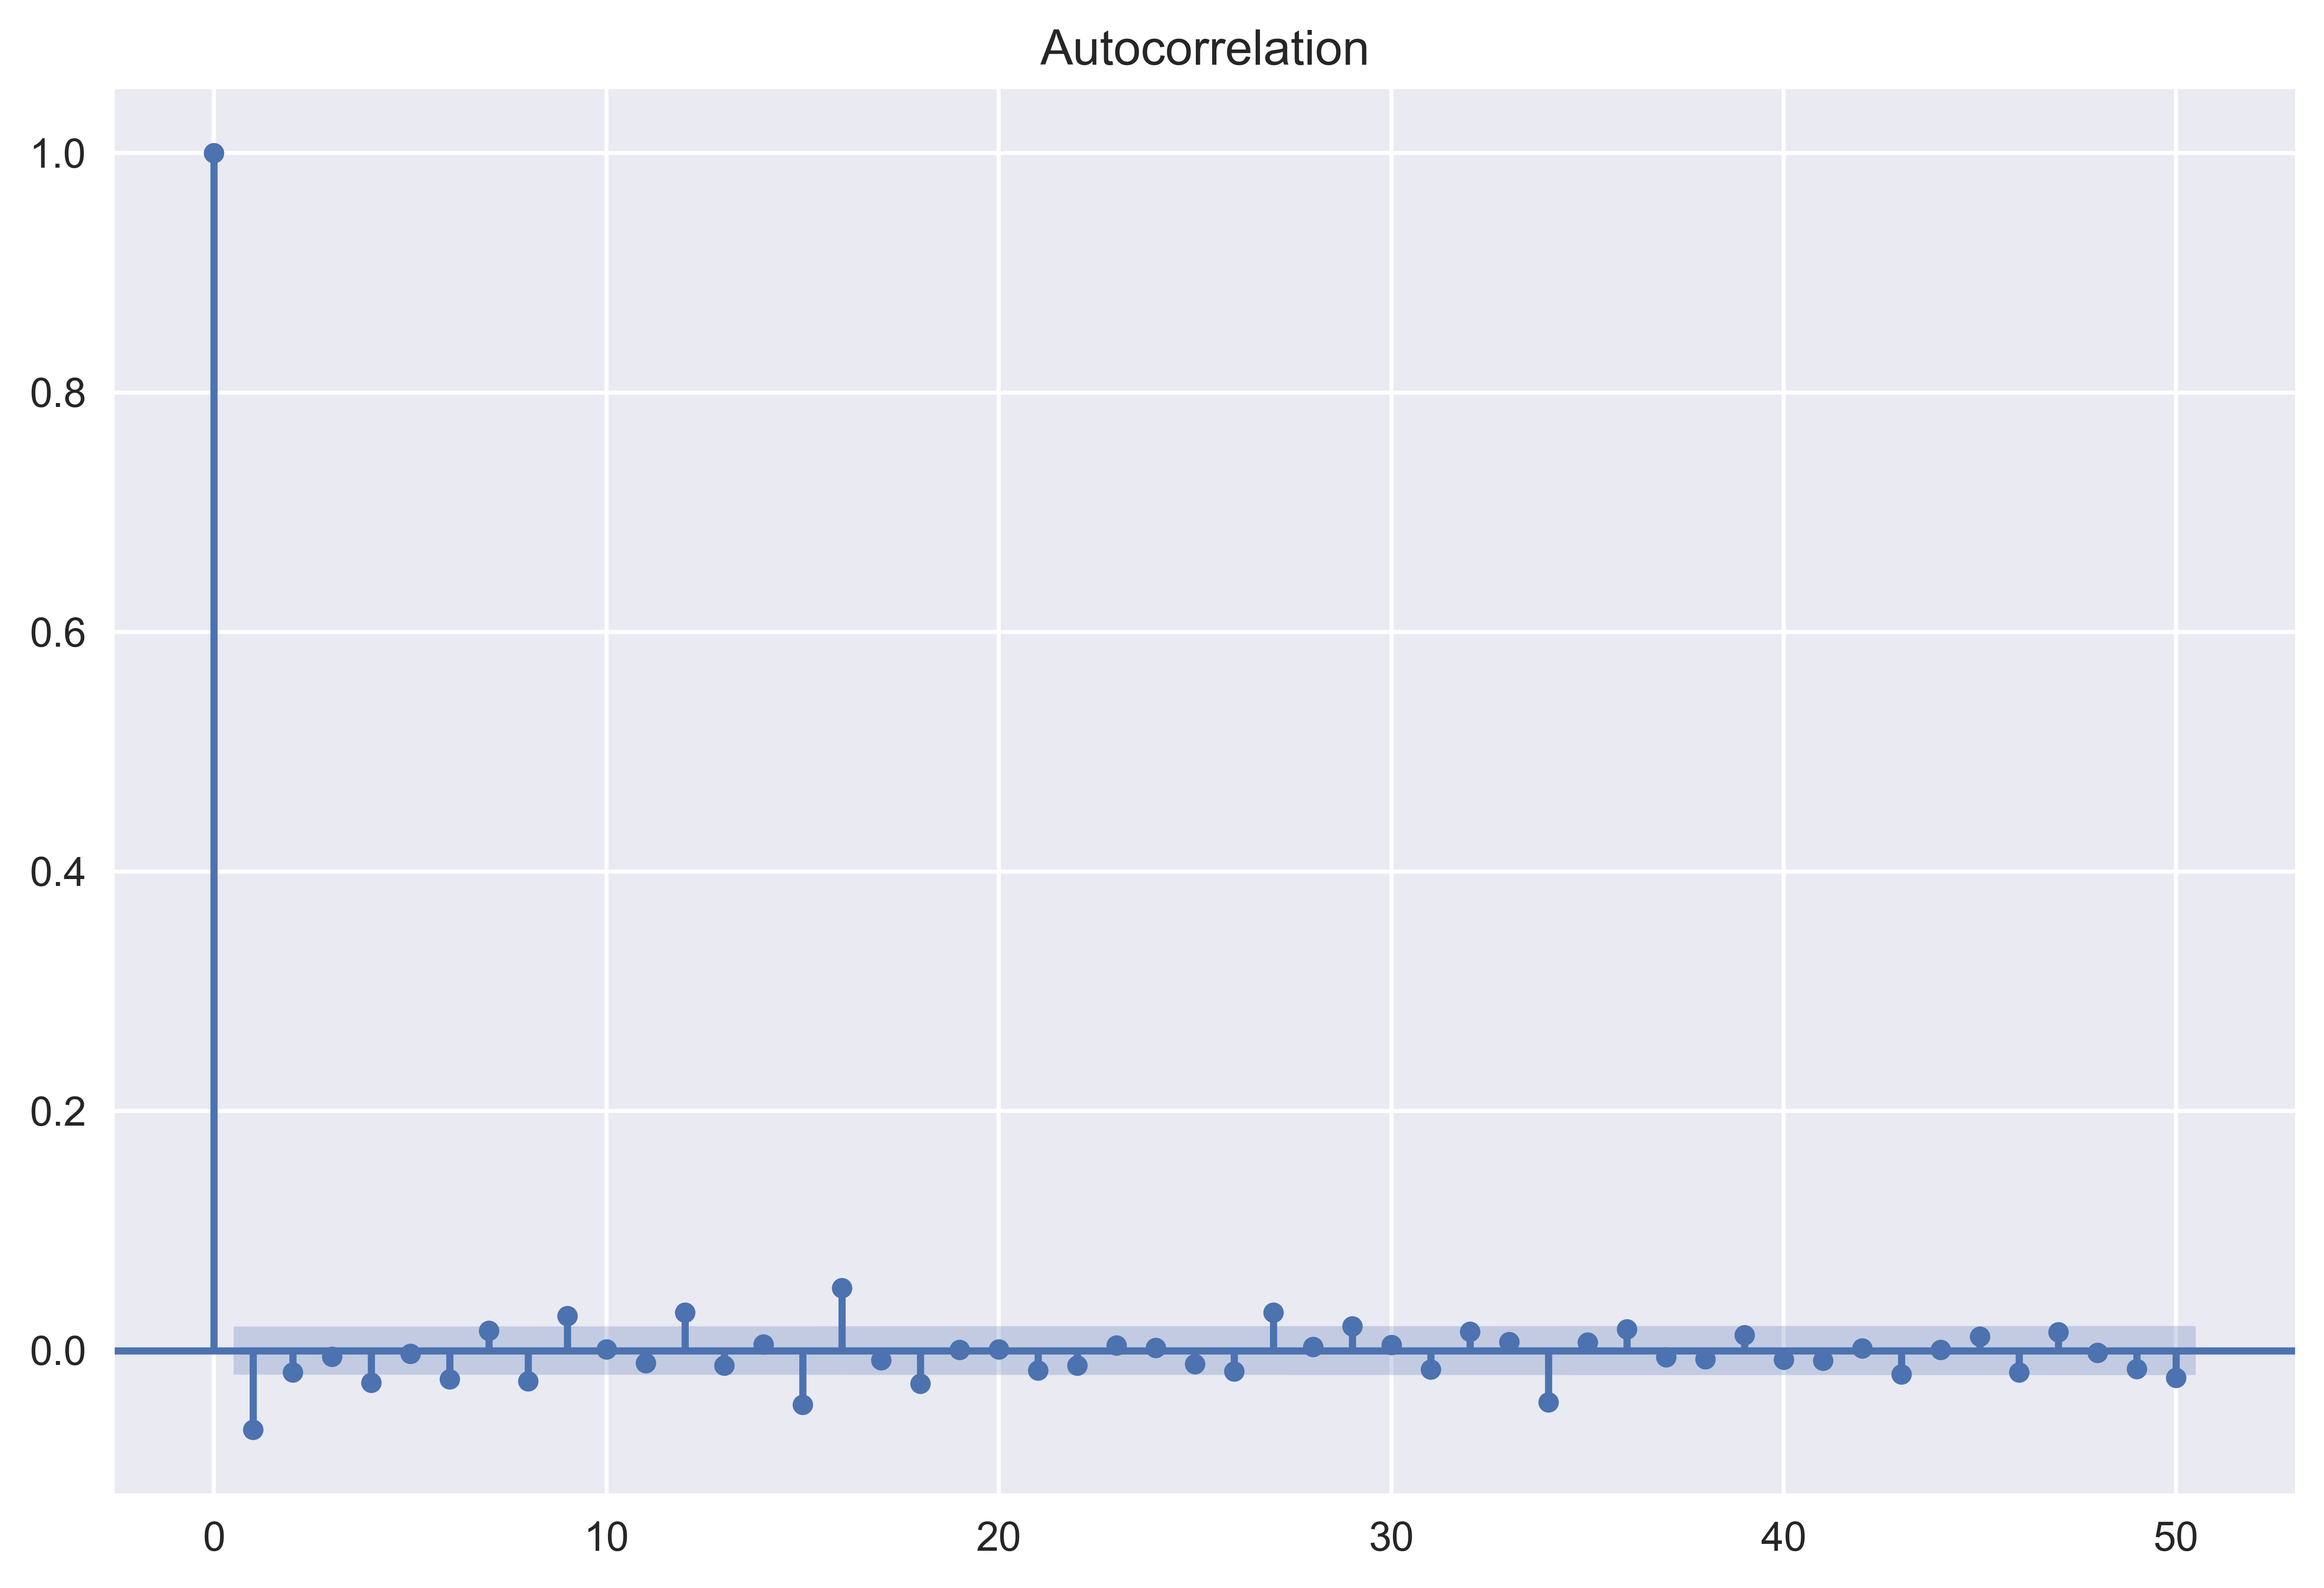

In [83]:
acf = smt.graphics.plot_acf(df.log_rtn,
                           lags=N_LAGS,
                           alpha=SIGNIFICANCE_LEVEL)
plt.tight_layout()
# plt.savefig('images/ch1_im13.png')
plt.show()

## Identifying outliers